In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [110]:
pd.set_option('display.max_columns', None)

In [111]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [112]:
#checking for the null values
data.isna().sum()
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


we have one column that have all the null values, we will remove that column, also we will drop policy number and zipcode for now

In [113]:
cat = data.columns
len(cat)

40

N    753
Y    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

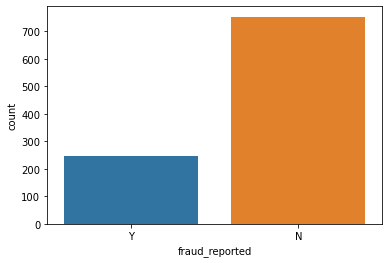

In [114]:
print(data['fraud_reported'].value_counts())
sns.countplot(data['fraud_reported'])

Data Seems unbalanced, so we will balance the dataset after EDA

# EDA

In [115]:
# lets divide the dataset based on fraud reported for better analysis
data_Y = data[data.fraud_reported =='Y']
data_N = data[data.fraud_reported =='N']
data_N

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


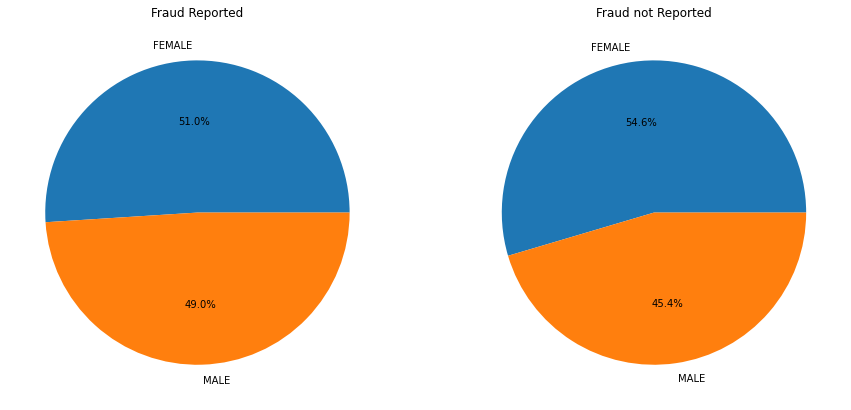

<Figure size 720x720 with 0 Axes>

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['insured_sex'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['insured_sex'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Fraud Reported')
ax2.pie(data_N['insured_sex'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Fraud not Reported')
plt.show()

We cant see any significant pattern or trend based on the demographic data, it seems that the proportion of male increases little bit around (4%) when the fraud was reported

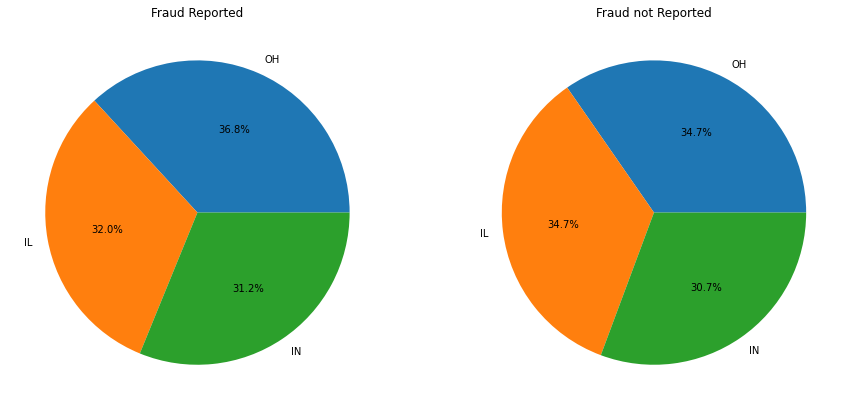

<Figure size 720x720 with 0 Axes>

In [117]:
# lets check for the states

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['policy_state'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['policy_state'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Fraud Reported')
ax2.pie(data_N['policy_state'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Fraud not Reported')
plt.show()

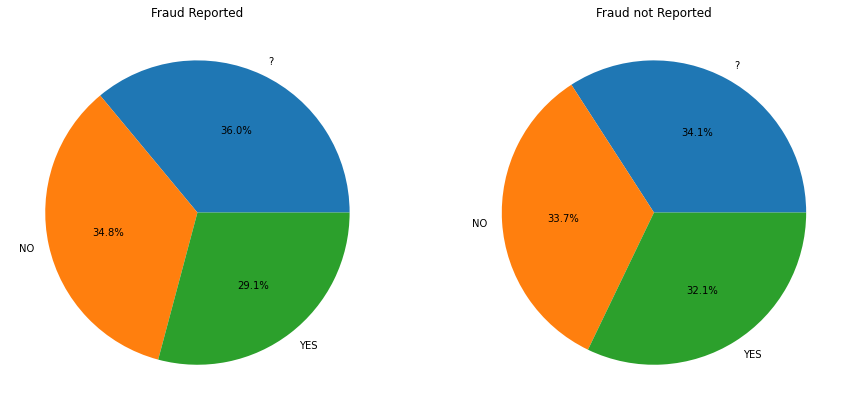

<Figure size 720x720 with 0 Axes>

In [118]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['police_report_available'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['police_report_available'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Fraud Reported')
ax2.pie(data_N['police_report_available'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Fraud not Reported')
plt.show()

data is evenly divided betwwen the three state, on significant pattern found

avg claim amount when fraud reported -- 60302.10526315789
avg claim amount when fraud not reported -- 50288.605577689246


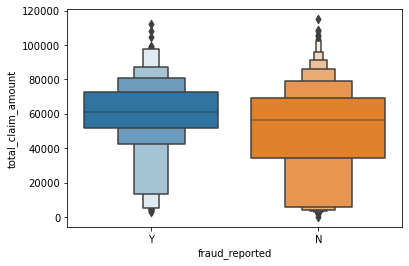

In [119]:
# lets check relation between claim amount and fraud claims
print('avg claim amount when fraud reported --',data[data['fraud_reported']=='Y']['total_claim_amount'].mean())
print('avg claim amount when fraud not reported --',data[data['fraud_reported']=='N']['total_claim_amount'].mean())
sns.boxenplot(x=data['fraud_reported'],y=data['total_claim_amount'],data=data)
plt.show()

as we can see for fraud reported data, total claim amount is bit higher than the one with legit claims, we can say that people who claims amount is higher are mostly likely be fraud

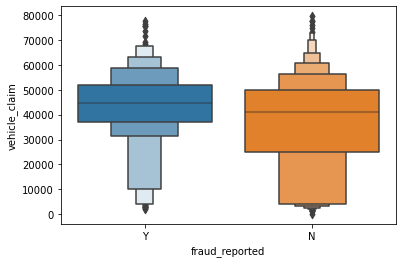

In [120]:
sns.boxenplot(x=data['fraud_reported'],y=data['vehicle_claim'],data=data)
plt.show()

from the above two box plot we can see that total claims and vechile claim may be highly correlated, which can causes multicolineairty problem,we will look into in more detail further 

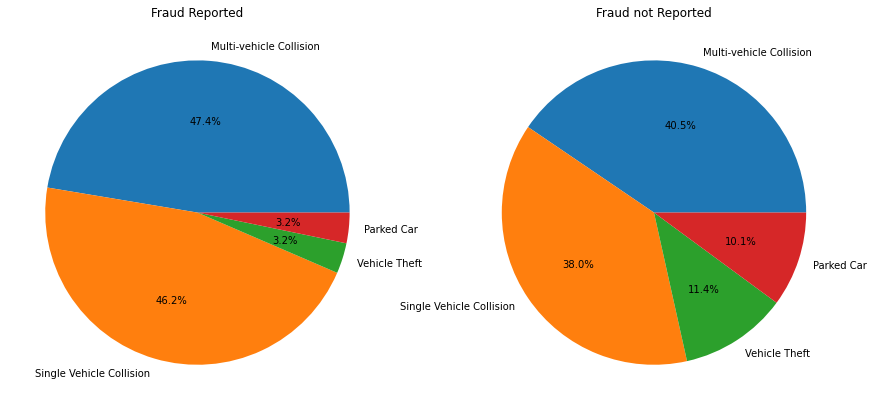

<Figure size 720x720 with 0 Axes>

In [121]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['incident_type'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['incident_type'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Fraud Reported')
ax2.pie(data_N['incident_type'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Fraud not Reported')
plt.show()

here we can see that out of all the fraud reported cases almost 94% of the report belongs to collison, howvere only 6% of the reports belongs to other category

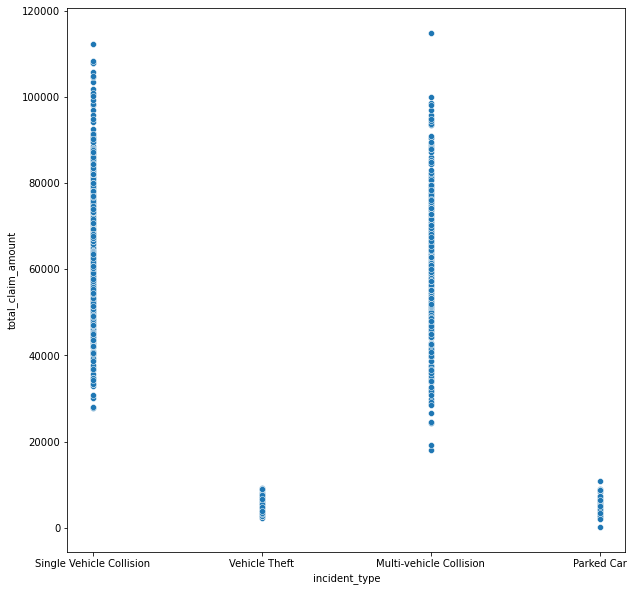

In [122]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['total_claim_amount'],x=data['incident_type'])
plt.show()

here we see that the claimed amount for parked car and vehicl theft are significantly smaller, may be that is the reason that these two types contributes very less in fraud claims

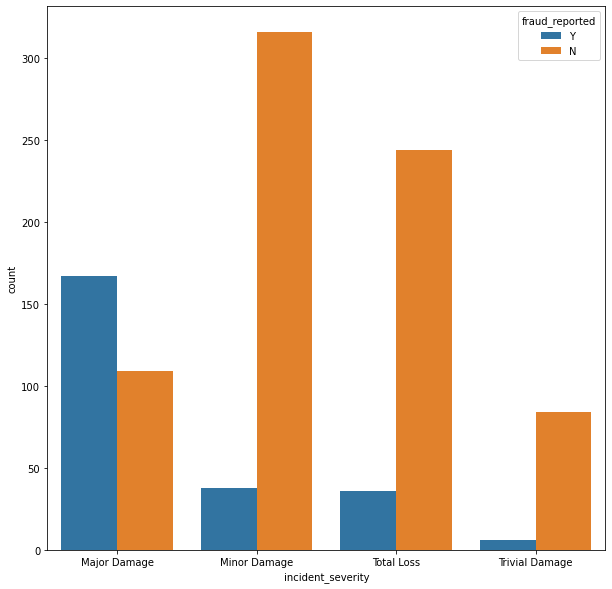

In [123]:
plt.figure(figsize=(10,10))
sns.countplot(hue=data['fraud_reported'],x=data['incident_severity'])
plt.show()

here we see an interesting trend that whenevver there are major damage the chances of fraud claims are higher

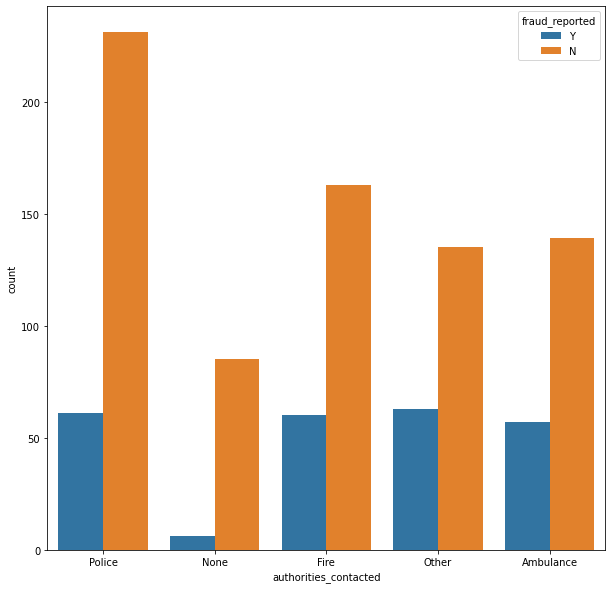

In [124]:
# authorities_contacted

plt.figure(figsize=(10,10))
sns.countplot(hue=data['fraud_reported'],x=data['authorities_contacted'])
plt.show()

there is an interesting trend, when none of the authorities is involed than the chances of fraud claim reduces drastically

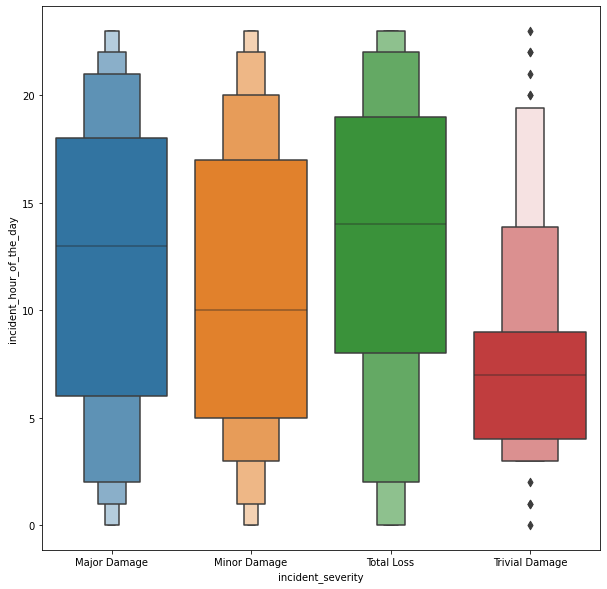

In [125]:
plt.figure(figsize=(10,10))
sns.boxenplot(x=data['incident_severity'],y=data['incident_hour_of_the_day'])
plt.show()

here we can see that as the day progress the severity of the incident also increases

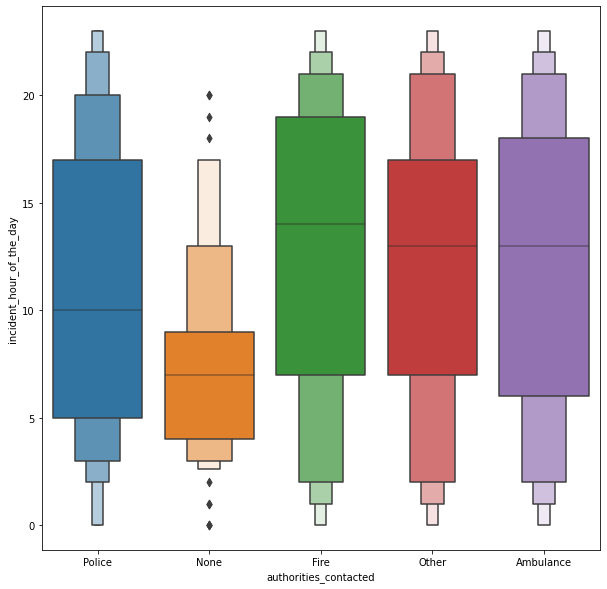

In [126]:
plt.figure(figsize=(10,10))
sns.boxenplot(x=data['authorities_contacted'],y=data['incident_hour_of_the_day'])
plt.show()

when we compare the above two boxenplot we see common trend between trivial damage and none authorties are identical which means that almost all the trivial damage incident didnt involved any authorities

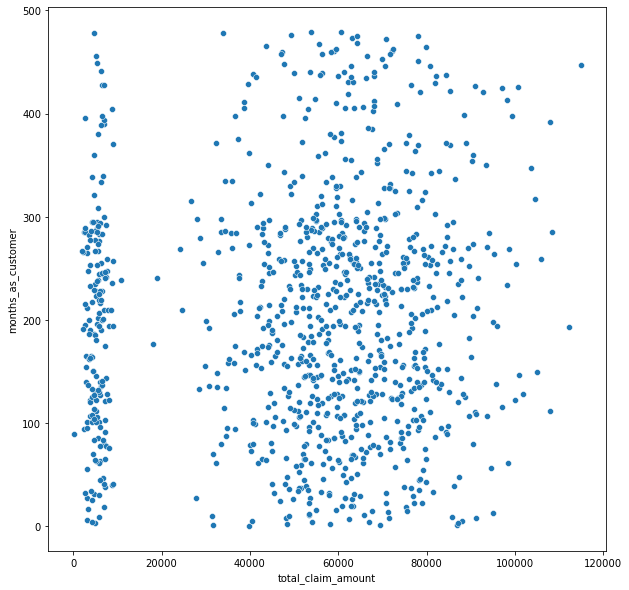

In [127]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['months_as_customer'],x=data['total_claim_amount'])
plt.show()

in this scatter we see that lower parts are mor dense than the upper part which infers that the new customers are more likely to claim for an incident

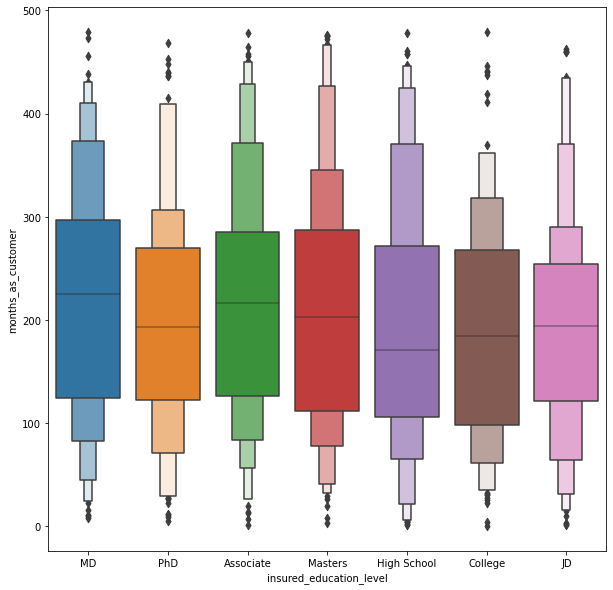

In [128]:
plt.figure(figsize=(10,10))
sns.boxenplot(y=data['months_as_customer'],x=data['insured_education_level'])
plt.show()

no significant trend found,

one thing to note most of customer stays between 100 and 300 months with this company

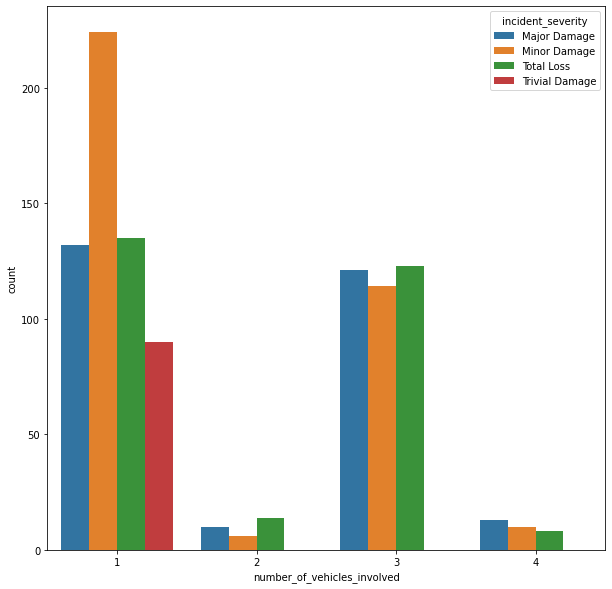

In [129]:
plt.figure(figsize=(10,10))
sns.countplot(hue=data['incident_severity'],x=data['number_of_vehicles_involved'])
plt.show()

as expected, as the severity increase, the involvment of number of vehicle also increases, howver proportion of involvment of 4 cars is very less

# Data preprocessing

In [130]:
#check for the null values

#checking for the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [131]:
for i in data.columns:
    if data[i].dtypes == object:
        print(i,' ----- ', data[i].nunique())

policy_bind_date  -----  951
policy_state  -----  3
policy_csl  -----  3
insured_sex  -----  2
insured_education_level  -----  7
insured_occupation  -----  14
insured_hobbies  -----  20
insured_relationship  -----  6
incident_date  -----  60
incident_type  -----  4
collision_type  -----  4
incident_severity  -----  4
authorities_contacted  -----  5
incident_state  -----  7
incident_city  -----  7
incident_location  -----  1000
property_damage  -----  3
police_report_available  -----  3
auto_make  -----  14
auto_model  -----  39
fraud_reported  -----  2


In [132]:
# I will be deleting all those categorical columns who has more than 5 varibales
data.drop(columns=['policy_bind_date','insured_occupation','insured_education_level','insured_hobbies',
                  'insured_relationship','incident_date','incident_state','incident_city','incident_location',
                   'auto_make','auto_model'],inplace=True)
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,Y,NaN
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,2007,Y,NaN
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,N,NaN
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,2014,Y,NaN
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,?,87200,17440,8720,61040,2006,N,NaN
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,?,108480,18080,18080,72320,2015,N,NaN
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,?,2,3,YES,67500,7500,7500,52500,1996,N,NaN
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,?,0,1,YES,46980,5220,5220,36540,1998,N,NaN


In [133]:
data.drop(columns='_c39',inplace=True)

In [134]:
# we will select best features using chi square technique

for i in data.columns:
    if data[i].dtypes == 'object':
        print(i, ' ----', data[i].unique(),'\n')

policy_state  ---- ['OH' 'IN' 'IL'] 

policy_csl  ---- ['250/500' '100/300' '500/1000'] 

insured_sex  ---- ['MALE' 'FEMALE'] 

incident_type  ---- ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car'] 

collision_type  ---- ['Side Collision' '?' 'Rear Collision' 'Front Collision'] 

incident_severity  ---- ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage'] 

authorities_contacted  ---- ['Police' 'None' 'Fire' 'Other' 'Ambulance'] 

property_damage  ---- ['YES' '?' 'NO'] 

police_report_available  ---- ['YES' '?' 'NO'] 

fraud_reported  ---- ['Y' 'N'] 



Now I will use label encode of all those categorical column who have two values

In [135]:
from sklearn.preprocessing import LabelEncoder

data['insured_sex'] = LabelEncoder().fit_transform(data['insured_sex'])
data['fraud_reported'] = LabelEncoder().fit_transform(data['fraud_reported'])

for all those columns who have more than two variables we will use get dummies encoder

In [136]:
x = pd.get_dummies(data['policy_csl'],prefix='policy_csl_')
y = pd.get_dummies(data['collision_type'],prefix='collision_type_')
z = pd.get_dummies(data['incident_severity'],prefix='incident_severity_')
a = pd.get_dummies(data['authorities_contacted'],prefix='authorities_contacted_')
b = pd.get_dummies(data['property_damage'],prefix='property_damage_')
c = pd.get_dummies(data['police_report_available'],prefix='police_report_available_')
d = pd.get_dummies(data['incident_type'],prefix='incident_type_')
e = pd.get_dummies(data['policy_state'],prefix='policy_state_')
data = pd.concat([data,x,y,z,a,b,c,d,e],axis=1)

In [137]:
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_csl__100/300,policy_csl__250/500,policy_csl__500/1000,collision_type__?,collision_type__Front Collision,collision_type__Rear Collision,collision_type__Side Collision,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,incident_severity__Trivial Damage,authorities_contacted__Ambulance,authorities_contacted__Fire,authorities_contacted__None,authorities_contacted__Other,authorities_contacted__Police,property_damage__?,property_damage__NO,property_damage__YES,police_report_available__?,police_report_available__NO,police_report_available__YES,incident_type__Multi-vehicle Collision,incident_type__Parked Car,incident_type__Single Vehicle Collision,incident_type__Vehicle Theft,policy_state__IL,policy_state__IN,policy_state__OH
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,1,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,1,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,2007,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,0,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,0,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,2014,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,1,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,2009,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,0,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,?,87200,17440,8720,61040,2006,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,0,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,?,108480,18080,18080,72320,2015,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,0,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,?,2,3,YES,67500,7500,7500,52500,1996,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,1,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,?,0,1,YES,46980,5220,5220,36540,1998,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0


In [139]:
data.drop(columns=['policy_csl','collision_type','incident_severity','authorities_contacted','property_damage',
                   'police_report_available','incident_type','policy_state'],inplace=True)

In [140]:
data

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_csl__100/300,policy_csl__250/500,policy_csl__500/1000,collision_type__?,collision_type__Front Collision,collision_type__Rear Collision,collision_type__Side Collision,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,incident_severity__Trivial Damage,authorities_contacted__Ambulance,authorities_contacted__Fire,authorities_contacted__None,authorities_contacted__Other,authorities_contacted__Police,property_damage__?,property_damage__NO,property_damage__YES,police_report_available__?,police_report_available__NO,police_report_available__YES,incident_type__Multi-vehicle Collision,incident_type__Parked Car,incident_type__Single Vehicle Collision,incident_type__Vehicle Theft,policy_state__IL,policy_state__IN,policy_state__OH
0,328,48,521585,1000,1406.91,0,466132,1,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,228,42,342868,2000,1197.22,5000000,468176,1,0,0,8,1,0,0,5070,780,780,3510,2007,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,134,29,687698,2000,1413.14,5000000,430632,0,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
3,256,41,227811,2000,1415.74,6000000,608117,0,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
4,228,44,367455,1000,1583.91,6000000,610706,1,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,0,20,1,0,1,87200,17440,8720,61040,2006,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
996,285,41,186934,1000,1436.79,0,608177,0,70900,0,23,1,2,3,108480,18080,18080,72320,2015,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
997,130,34,918516,500,1383.49,3000000,442797,0,35100,0,4,3,2,3,67500,7500,7500,52500,1996,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1
998,458,62,533940,2000,1356.92,5000000,441714,1,0,0,2,1,0,1,46980,5220,5220,36540,1998,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0


we have two many featurs so we will only use 50% of the features that are highly correlated(positvely or ngatively) with each other.

In [148]:
x = (np.abs(data.corrwith(data['fraud_reported'])).sort_values(ascending=False))
x = x.index

In [180]:
x = x[:(len(x)//2)]

In [190]:
data = data[x]

# Balancing the dataset

0    753
1    247
Name: fraud_reported, dtype: int64


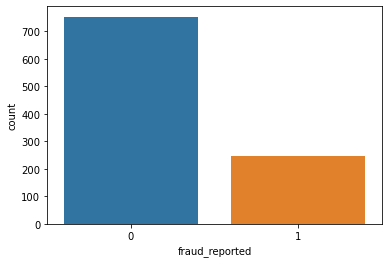

In [191]:
sns.countplot(x=data['fraud_reported'], data=data)
print(data['fraud_reported'].value_counts())

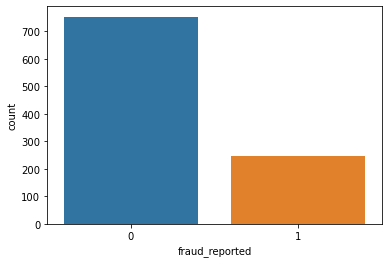

In [192]:
# as the data is unbalanced we will be balancing the dataset using resampling techniques
sns.countplot(x=data['fraud_reported'], data=data)

from sklearn.utils import resample
## 
data_yes = data[data.fraud_reported==1]
data_no = data[data.fraud_reported==0]

data_yes = resample(data_yes,replace=True,n_samples=683,random_state=25)

data_new = pd.concat([data_yes,data_no])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

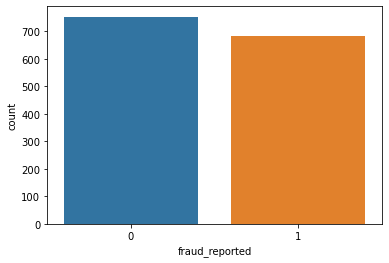

In [193]:
sns.countplot(x=data_new['fraud_reported'], data=data)

In [194]:
data_new

,fraud_reported,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,vehicle_claim,collision_type__?,total_claim_amount,property_claim,authorities_contacted__None,incident_severity__Trivial Damage,incident_type__Vehicle Theft,incident_type__Parked Car,collision_type__Rear Collision,injury_claim,property_damage__NO,incident_type__Single Vehicle Collision,authorities_contacted__Other,property_damage__?,umbrella_limit,authorities_contacted__Police,number_of_vehicles_involved,authorities_contacted__Ambulance,witnesses,incident_type__Multi-vehicle Collision
498,1,1,0,0,52020,0,63580,5780,0,0,0,0,0,5780,0,1,0,1,0,1,1,0,0,0
234,1,1,0,0,37520,0,53600,10720,0,0,0,0,0,5360,0,0,1,1,0,0,3,0,2,1
869,1,1,0,0,29680,0,40810,7420,0,0,0,0,1,3710,0,0,0,0,0,1,3,0,3,1
558,1,0,0,1,19110,0,24570,2730,0,0,0,0,0,2730,1,0,0,0,0,0,3,0,1,1
227,1,1,0,0,30310,0,47630,4330,0,0,0,0,0,12990,0,1,1,1,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,61040,0,87200,8720,0,0,0,0,0,17440,0,1,0,0,0,0,1,0,1,0
996,0,1,0,0,72320,0,108480,18080,0,0,0,0,1,18080,0,1,0,0,0,0,1,0,3,0
997,0,0,1,0,52500,0,67500,7500,0,0,0,0,0,7500,0,0,0,1,3000000,1,3,0,3,1
998,0,1,0,0,36540,0,46980,5220,0,0,0,0,1,5220,0,1,1,1,5000000,0,1,0,1,0


<AxesSubplot:>

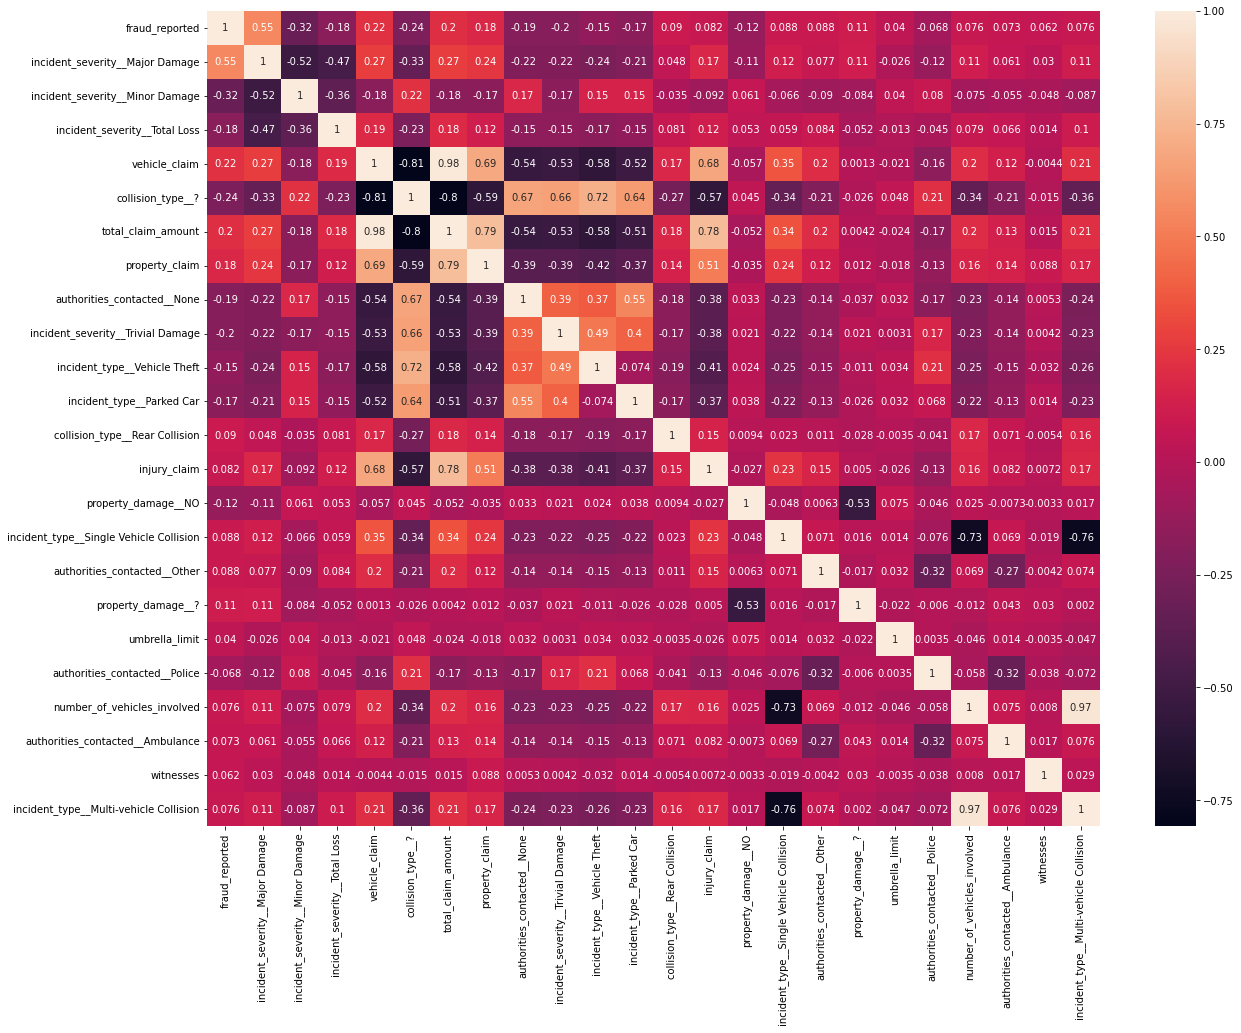

In [196]:
plt.figure(figsize=(20,15))
sns.heatmap(data_new.corr(),annot=True)

there are few features which are related to each other so we will delete  one of the columsn to reduce multicolinearity problem

In [199]:
data_new.drop(columns=['total_claim_amount','incident_type__Multi-vehicle Collision'],inplace=True)
data_new

,fraud_reported,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,vehicle_claim,collision_type__?,property_claim,authorities_contacted__None,incident_severity__Trivial Damage,incident_type__Vehicle Theft,incident_type__Parked Car,collision_type__Rear Collision,injury_claim,property_damage__NO,incident_type__Single Vehicle Collision,authorities_contacted__Other,property_damage__?,umbrella_limit,authorities_contacted__Police,number_of_vehicles_involved,authorities_contacted__Ambulance,witnesses
498,1,1,0,0,52020,0,5780,0,0,0,0,0,5780,0,1,0,1,0,1,1,0,0
234,1,1,0,0,37520,0,10720,0,0,0,0,0,5360,0,0,1,1,0,0,3,0,2
869,1,1,0,0,29680,0,7420,0,0,0,0,1,3710,0,0,0,0,0,1,3,0,3
558,1,0,0,1,19110,0,2730,0,0,0,0,0,2730,1,0,0,0,0,0,3,0,1
227,1,1,0,0,30310,0,4330,0,0,0,0,0,12990,0,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,61040,0,8720,0,0,0,0,0,17440,0,1,0,0,0,0,1,0,1
996,0,1,0,0,72320,0,18080,0,0,0,0,1,18080,0,1,0,0,0,0,1,0,3
997,0,0,1,0,52500,0,7500,0,0,0,0,0,7500,0,0,0,1,3000000,1,3,0,3
998,0,1,0,0,36540,0,5220,0,0,0,0,1,5220,0,1,1,1,5000000,0,1,0,1


<AxesSubplot:>

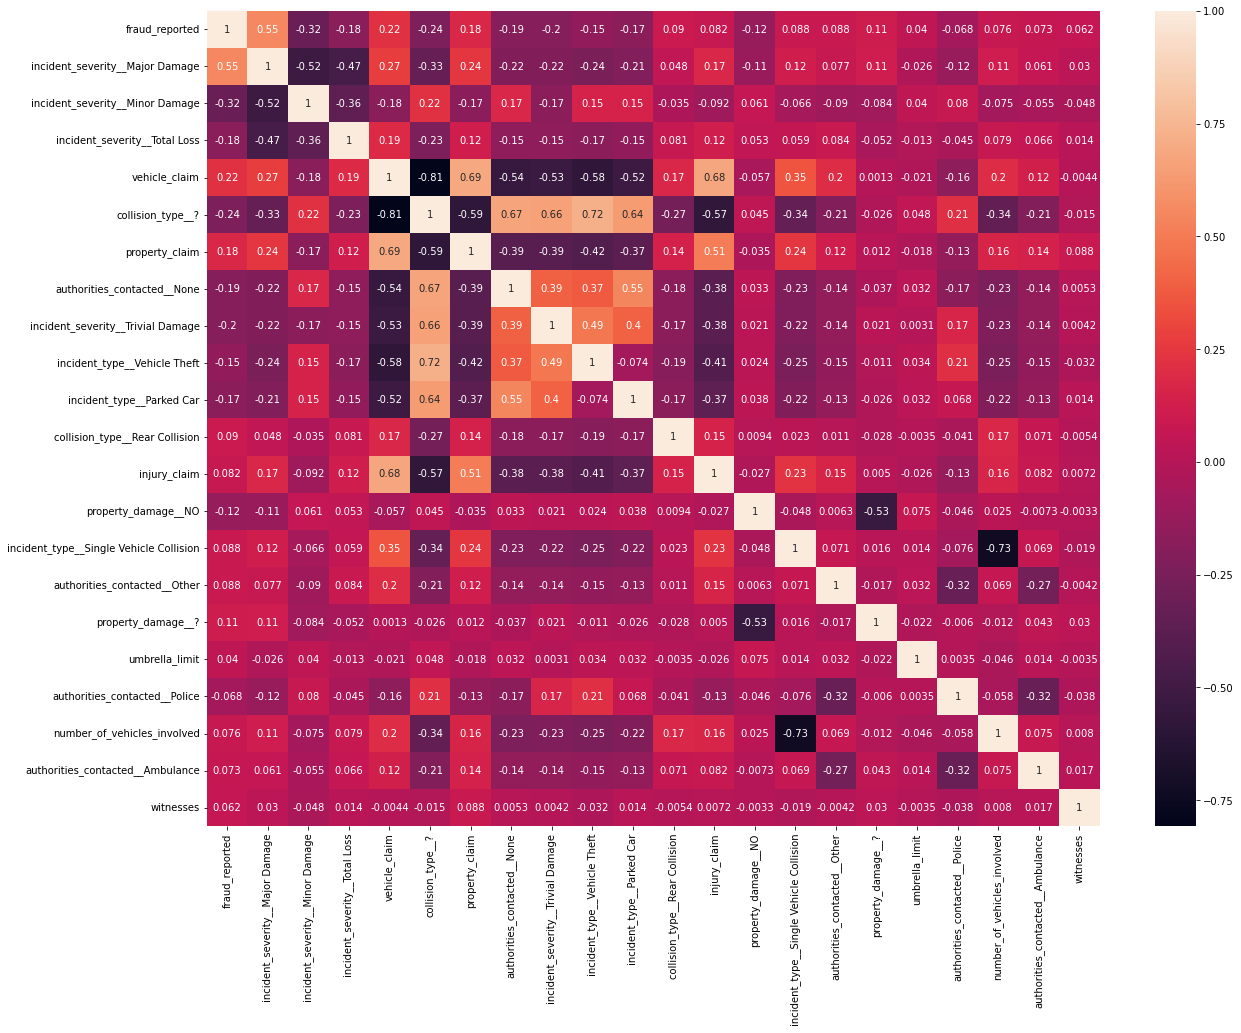

In [200]:
plt.figure(figsize=(20,15))
sns.heatmap(data_new.corr(),annot=True)

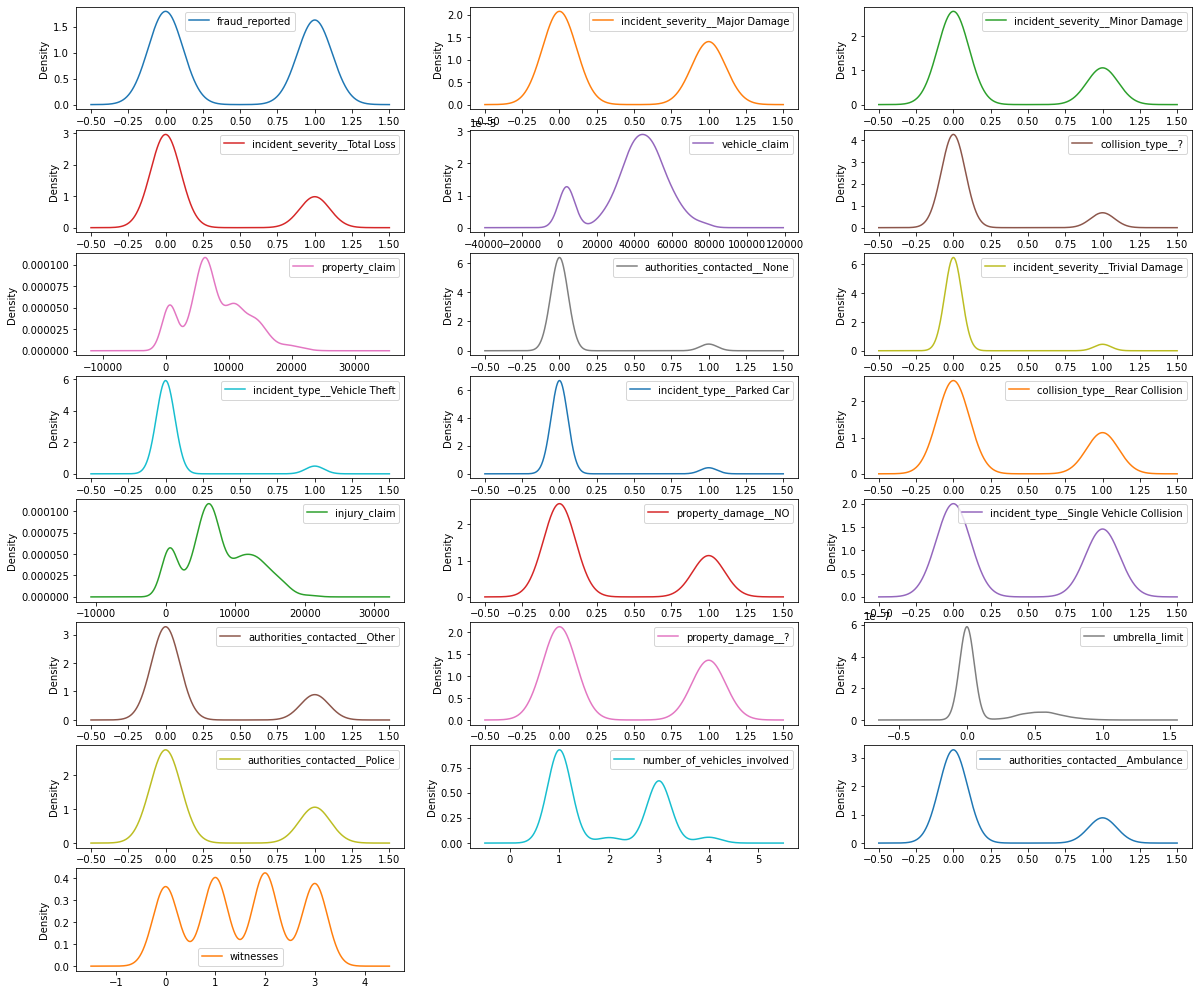

vehicle_claim    -0.723300
property_claim    0.386598
injury_claim      0.297787
umbrella_limit    1.804068
witnesses        -0.030786
dtype: float64


In [203]:
data_new[['vehicle_claim','property_claim','injury_claim','umbrella_limit','witnesses']].plot(kind='density',figsize=(20,20),subplots=True,layout=(9,3),sharex=False)
plt.show()
print(data_new[['vehicle_claim','property_claim','injury_claim','umbrella_limit','witnesses']].skew())

we will remove umbrella limit column as it is highly skewed and its doesnot have significant correaltion with the label

In [204]:
data_new.drop(columns='umbrella_limit',inplace=True)

# spliting the dataset

In [212]:
X = data_new.drop(columns='fraud_reported')
y = data_new['fraud_reported']
X

,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,vehicle_claim,collision_type__?,property_claim,authorities_contacted__None,incident_severity__Trivial Damage,incident_type__Vehicle Theft,incident_type__Parked Car,collision_type__Rear Collision,injury_claim,property_damage__NO,incident_type__Single Vehicle Collision,authorities_contacted__Other,property_damage__?,authorities_contacted__Police,number_of_vehicles_involved,authorities_contacted__Ambulance,witnesses
498,1,0,0,52020,0,5780,0,0,0,0,0,5780,0,1,0,1,1,1,0,0
234,1,0,0,37520,0,10720,0,0,0,0,0,5360,0,0,1,1,0,3,0,2
869,1,0,0,29680,0,7420,0,0,0,0,1,3710,0,0,0,0,1,3,0,3
558,0,0,1,19110,0,2730,0,0,0,0,0,2730,1,0,0,0,0,3,0,1
227,1,0,0,30310,0,4330,0,0,0,0,0,12990,0,1,1,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,61040,0,8720,0,0,0,0,0,17440,0,1,0,0,0,1,0,1
996,1,0,0,72320,0,18080,0,0,0,0,1,18080,0,1,0,0,0,1,0,3
997,0,1,0,52500,0,7500,0,0,0,0,0,7500,0,0,0,1,1,3,0,3
998,1,0,0,36540,0,5220,0,0,0,0,1,5220,0,1,1,1,0,1,0,1


0.5169428836539173


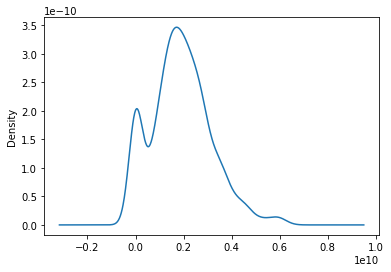

In [213]:
# removing skewness from total charges column using ssquaring technique

X['vehicle_claim'] = np.square(X['vehicle_claim'])
X['vehicle_claim'].plot(kind='density')
print(X['vehicle_claim'].skew())

# spliting the dataset

In [214]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[ 1.21660929, -0.62783338, -0.57627812, ..., -0.85905863,
        -0.52038107, -1.3921053 ],
       [ 1.21660929, -0.62783338, -0.57627812, ...,  1.08516232,
        -0.52038107,  0.43937726],
       [ 1.21660929, -0.62783338, -0.57627812, ...,  1.08516232,
        -0.52038107,  1.35511854],
       ...,
       [-0.82195657,  1.59277927, -0.57627812, ...,  1.08516232,
        -0.52038107,  1.35511854],
       [ 1.21660929, -0.62783338, -0.57627812, ..., -0.85905863,
        -0.52038107, -0.47636402],
       [-0.82195657,  1.59277927, -0.57627812, ..., -0.85905863,
        -0.52038107,  1.35511854]])

All the preprocessing of the data has been done, now we will train the model

I will be using follwoing model for prediction:
    
    Logisitics Regression
    DecsionTree
    Random Forest
    Knn

###### Identifying best random state for logisitics regression

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7465277777777778 random state - 0
Accurancy Score -  0.7847222222222222 random state - 1
Accurancy Score -  0.7916666666666666 random state - 4
Accurancy Score -  0.7951388888888888 random state - 7
Accurancy Score -  0.8090277777777778 random state - 12
Accurancy Score -  0.8159722222222222 random state - 21
Accurancy Score -  0.8263888888888888 random state - 89
Accurancy Score -  0.8402777777777778 random state - 97


###### Confusion matrix and clssification report - Logistics Regression

In [217]:
#the random state from logisitics regression is 97, so we will use to generate confusion matrix and classification report
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=97)
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = lm.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 84.02777777777779 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       147
           1       0.89      0.77      0.82       141

    accuracy                           0.84       288
   macro avg       0.85      0.84      0.84       288
weighted avg       0.85      0.84      0.84       288

[[134  13]
 [ 33 108]]


###### Identifying best random state for KNN

In [218]:
# best the best random state for Logistic regrssion model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7673611111111112 random state - 0
Accurancy Score -  0.7777777777777778 random state - 1
Accurancy Score -  0.78125 random state - 3
Accurancy Score -  0.7986111111111112 random state - 7
Accurancy Score -  0.8090277777777778 random state - 9
Accurancy Score -  0.8298611111111112 random state - 21


###### Confusion matrix and clssification report - KNN

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=21)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = knn.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 82.98611111111111 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       136
           1       0.83      0.86      0.84       152

    accuracy                           0.83       288
   macro avg       0.83      0.83      0.83       288
weighted avg       0.83      0.83      0.83       288

[[109  27]
 [ 22 130]]


###### Identifying best random state for Decision Tree

In [221]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8506944444444444 random state - 0
Accurancy Score -  0.8645833333333334 random state - 2
Accurancy Score -  0.8680555555555556 random state - 3
Accurancy Score -  0.8923611111111112 random state - 7
Accurancy Score -  0.8993055555555556 random state - 11
Accurancy Score -  0.9131944444444444 random state - 17
Accurancy Score -  0.9166666666666666 random state - 92


###### Confusion matrix and clssification report - Decision Tree

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=92)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = dt.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 91.66666666666666 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       149
           1       0.88      0.96      0.92       139

    accuracy                           0.92       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288

[[131  18]
 [  6 133]]


###### Identifying best random state for Random Forest

In [223]:
# best the best random state for Logistic regrssion model
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8888888888888888 random state - 0
Accurancy Score -  0.9131944444444444 random state - 1
Accurancy Score -  0.9166666666666666 random state - 4
Accurancy Score -  0.9305555555555556 random state - 7
Accurancy Score -  0.9409722222222222 random state - 17
Accurancy Score -  0.9513888888888888 random state - 21


In [225]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=21)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 95.13888888888889 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       136
           1       0.94      0.97      0.95       152

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288

[[126  10]
 [  4 148]]


###### AUC ROC Curve

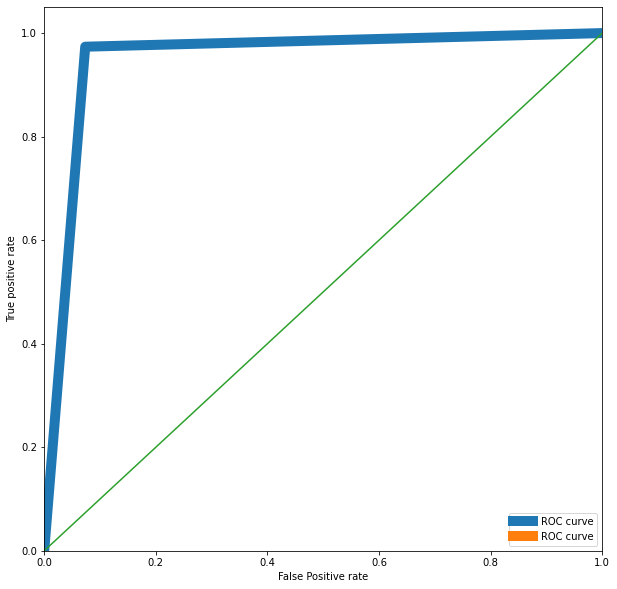

In [226]:
plt.figure(figsize=(10,10))
fpr,tpr,th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,roc_auc,lw=10,label='ROC curve' % roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

##### Hyper Parameter tuning

In [228]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'min_samples_split': range(1,5),'max_depth':range(1,5)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [230]:
ri = 0
acc = 0
for i in range(1,100):
    rf = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=1,min_samples_split=3,random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_pred,y_test)

    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8194444444444444 random state - 1
Accurancy Score -  0.8229166666666666 random state - 3
Accurancy Score -  0.8263888888888888 random state - 82


In [238]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=21)
rf = RandomForestClassifier(criterion='gini', max_depth=125, min_samples_leaf=1,min_samples_split=2,random_state=82)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 95.13888888888889 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       136
           1       0.94      0.97      0.95       152

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288

[[126  10]
 [  4 148]]


We are getting the same result after doing the hyper parameter tuning 

##### Saving the best Model - Random Forest

In [239]:
import pickle

filename = 'final_model.pkl'
pickle.dump(rf, open('rf.pkl', 'wb'))